In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [26]:
# target variable is diagnosis
df['diagnosis'].value_counts()

# 0 for negative prediction and 1 for positive prediction

diagnosis
1    357
0    212
Name: count, dtype: int64

In [32]:
X =df.drop(['diagnosis'],axis =1)
y = df['diagnosis']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
# We need to convert our training data into LightGBM dataser format
!pip install lightgbm



  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 960.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 2.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 3.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 3.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 3.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.7 MB/s eta 0:00:01
   -----------------------------------

LGBMClassifier()

In [37]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier()

In [38]:
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print('LightGBM Model accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score:0.9298


In [43]:
# We are looking at now the train set accuracy of the model

y_pred_train = clf.predict(X_train)

In [53]:
accuracy_train  = accuracy_score(y_train,y_pred_train)
print('Trainig set accyracy score :{0:0.4f}'.format(accuracy_train))

Trainig set accyracy score :1.0000


In [55]:
# Checking for the overfitting
print('Trainig set accuracy :{0:0.4f}'.format(accuracy_train))
print('Testing ata accuracy :{0:0.4f}'.format(accuracy))

Trainig set accuracy :1.0000
Testing ata accuracy :0.9298


In [56]:
# The training and test set accuracy are quite comparable. So no overfitting

In [69]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix',cm)
print('tp',cm[0,0])
print('tn',cm[1,1])
print('fp',cm[0,1])

Confusion Matrix [[ 55   8]
 [  4 104]]
tp 55
tn 104
fp 8


<Axes: >

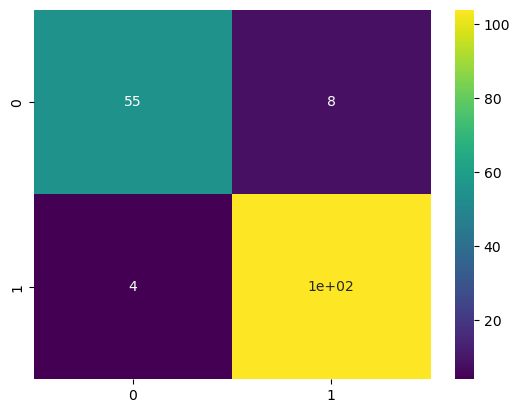

In [70]:

sns.heatmap(cm,annot =True,cmap='viridis')


In [71]:
# Classification Metrices

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

